In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio import AlignIO
import seaborn as sns

In [9]:
aln = AlignIO.read(open('/home/nastya/Bacteroides_uniformis_annotations/CD-HIT/lexA_filtered.clustal'), 'clustal')
print(aln)

Alignment with 40 rows and 307 columns
------------------------------------MTGEEVRD...--- BACT.1122.00017.0001i_03592
-------------------------MQEVDDKKLSDLSKRFLQA...--- BACT.1122.00032.0023i_04935
-------------------------MNEKQTDTLLNVPEIVKRA...MMM BACT.1122.00016.0001i_00630
-------------------------MNEKQADTLLNVPEIVKRA...MMM BACT.1122.00010.0001i_00808
------------------------------MDTCLNVGEIVKRA...MMM BACT.1122.00037.0009i_02106
------------------------------MDTILDVPGIIKRA...MTM BACT.1122.00041.0104i_02706
------------------------------MDTNLDVPGIIKRA...MMM BACT.1122.00018.0001i_00753
------------------------------MDTNLDVPGIIKRA...MMM BACT.1122.00018.0001i_00988
------------------------------MDTNLDVTGIIKRA...MMM BACT.1122.00046.0079b_04268
------------------------------MDTNLDVLGIIKRA...MMM BACT.1122.00002.0001i_03728
------------------------------MDTFLDVTGIVKRA...MMM BACT.1122.00026.0011i_04441
------------------------------MDTFLDVTGIVKRA...MMM BACT.1122.00008.0001i_03248
-------------

In [10]:
calculator = DistanceCalculator('identity')
dm = calculator.get_distance(aln)
print(dm)

BACT.1122.00017.0001i_03592	0
BACT.1122.00032.0023i_04935	0.7752442996742671	0
BACT.1122.00016.0001i_00630	0.7003257328990228	0.7166123778501629	0
BACT.1122.00010.0001i_00808	0.6970684039087948	0.7198697068403909	0.039087947882736174	0
BACT.1122.00037.0009i_02106	0.6872964169381108	0.7296416938110749	0.2703583061889251	0.254071661237785	0
BACT.1122.00041.0104i_02706	0.6872964169381108	0.742671009771987	0.2931596091205212	0.2768729641693811	0.26384364820846906	0
BACT.1122.00018.0001i_00753	0.6872964169381108	0.7361563517915309	0.254071661237785	0.250814332247557	0.24429967426710097	0.12052117263843654	0
BACT.1122.00018.0001i_00988	0.6872964169381108	0.7361563517915309	0.254071661237785	0.247557003257329	0.24104234527687296	0.12377850162866455	0.0032573289902280145	0
BACT.1122.00046.0079b_04268	0.6840390879478828	0.7296416938110749	0.25732899022801303	0.250814332247557	0.24429967426710097	0.1368078175895765	0.07166123778501632	0.07491856677524433	0
BACT.1122.00002.0001i_03728	0.687296416

In [11]:
np.save('/home/nastya/Documents/distance_matrix.npy', dm)

In [12]:
dm1 = np.load(file='/home/nastya/Documents/distance_matrix.npy', allow_pickle=True)
dm_1 = pd.DataFrame(np.triu(dm1))
dm_2 = pd.DataFrame(np.tril(dm1))
dm_1[dm_1 == 0] = dm_2[dm_2 != 0]
dm_all = dm_1.fillna(0)

In [13]:
dm_all

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.000000,0.775244,0.700326,0.697068,0.687296,0.687296,0.687296,0.687296,0.684039,0.687296,...,0.697068,0.631922,0.778502,0.693811,0.697068,0.703583,0.697068,0.654723,0.716612,0.622150
1,0.775244,0.000000,0.716612,0.719870,0.729642,0.742671,0.736156,0.736156,0.729642,0.729642,...,0.723127,0.729642,0.791531,0.732899,0.729642,0.710098,0.729642,0.706840,0.703583,0.690554
2,0.700326,0.716612,0.000000,0.039088,0.270358,0.293160,0.254072,0.254072,0.257329,0.260586,...,0.254072,0.280130,0.371336,0.273616,0.296417,0.296417,0.280130,0.599349,0.700326,0.609121
3,0.697068,0.719870,0.039088,0.000000,0.254072,0.276873,0.250814,0.247557,0.250814,0.254072,...,0.244300,0.270358,0.368078,0.270358,0.286645,0.286645,0.276873,0.602606,0.703583,0.609121
4,0.687296,0.729642,0.270358,0.254072,0.000000,0.263844,0.244300,0.241042,0.244300,0.247557,...,0.205212,0.254072,0.361564,0.254072,0.273616,0.286645,0.273616,0.602606,0.703583,0.596091
5,0.687296,0.742671,0.293160,0.276873,0.263844,0.000000,0.120521,0.123779,0.136808,0.133550,...,0.270358,0.312704,0.394137,0.273616,0.296417,0.283388,0.276873,0.586319,0.693811,0.602606
6,0.687296,0.736156,0.254072,0.250814,0.244300,0.120521,0.000000,0.003257,0.071661,0.078176,...,0.244300,0.299674,0.377850,0.254072,0.289902,0.270358,0.254072,0.579805,0.690554,0.612378
7,0.687296,0.736156,0.254072,0.247557,0.241042,0.123779,0.003257,0.000000,0.074919,0.081433,...,0.244300,0.299674,0.377850,0.254072,0.289902,0.270358,0.254072,0.579805,0.690554,0.612378
8,0.684039,0.729642,0.257329,0.250814,0.244300,0.136808,0.071661,0.074919,0.000000,0.048860,...,0.247557,0.293160,0.377850,0.244300,0.283388,0.267101,0.267101,0.583062,0.684039,0.602606
9,0.687296,0.729642,0.260586,0.254072,0.247557,0.133550,0.078176,0.081433,0.048860,0.000000,...,0.247557,0.293160,0.377850,0.241042,0.289902,0.276873,0.273616,0.583062,0.690554,0.602606


In [14]:
data = pd.DataFrame(dm_all.values, columns = dm.names, index = dm.names)
data

,BACT.1122.00017.0001i_03592,BACT.1122.00032.0023i_04935,BACT.1122.00016.0001i_00630,BACT.1122.00010.0001i_00808,BACT.1122.00037.0009i_02106,BACT.1122.00041.0104i_02706,BACT.1122.00018.0001i_00753,BACT.1122.00018.0001i_00988,BACT.1122.00046.0079b_04268,BACT.1122.00002.0001i_03728,...,BACT.1122.00032.0019i_04226,BACT.1122.00043.0063i_03234,BACT.1122.00005.0001i_00420,BACT.1122.00044.0050i_02351,BACT.1122.00009.0001i_01926,BACT.1122.00048.0123i_01944,BACT.1122.00014.0001i_03527,BACT.1122.00023.0004i_02052,BACT.1122.00021.0003i_03076,BACT.1122.00003.0001i_02800
BACT.1122.00017.0001i_03592,0.000000,0.775244,0.700326,0.697068,0.687296,0.687296,0.687296,0.687296,0.684039,0.687296,...,0.697068,0.631922,0.778502,0.693811,0.697068,0.703583,0.697068,0.654723,0.716612,0.622150
BACT.1122.00032.0023i_04935,0.775244,0.000000,0.716612,0.719870,0.729642,0.742671,0.736156,0.736156,0.729642,0.729642,...,0.723127,0.729642,0.791531,0.732899,0.729642,0.710098,0.729642,0.706840,0.703583,0.690554
BACT.1122.00016.0001i_00630,0.700326,0.716612,0.000000,0.039088,0.270358,0.293160,0.254072,0.254072,0.257329,0.260586,...,0.254072,0.280130,0.371336,0.273616,0.296417,0.296417,0.280130,0.599349,0.700326,0.609121
BACT.1122.00010.0001i_00808,0.697068,0.719870,0.039088,0.000000,0.254072,0.276873,0.250814,0.247557,0.250814,0.254072,...,0.244300,0.270358,0.368078,0.270358,0.286645,0.286645,0.276873,0.602606,0.703583,0.609121
BACT.1122.00037.0009i_02106,0.687296,0.729642,0.270358,0.254072,0.000000,0.263844,0.244300,0.241042,0.244300,0.247557,...,0.205212,0.254072,0.361564,0.254072,0.273616,0.286645,0.273616,0.602606,0.703583,0.596091
BACT.1122.00041.0104i_02706,0.687296,0.742671,0.293160,0.276873,0.263844,0.000000,0.120521,0.123779,0.136808,0.133550,...,0.270358,0.312704,0.394137,0.273616,0.296417,0.283388,0.276873,0.586319,0.693811,0.602606
BACT.1122.00018.0001i_00753,0.687296,0.736156,0.254072,0.250814,0.244300,0.120521,0.000000,0.003257,0.071661,0.078176,...,0.244300,0.299674,0.377850,0.254072,0.289902,0.270358,0.254072,0.579805,0.690554,0.612378
BACT.1122.00018.0001i_00988,0.687296,0.736156,0.254072,0.247557,0.241042,0.123779,0.003257,0.000000,0.074919,0.081433,...,0.244300,0.299674,0.377850,0.254072,0.289902,0.270358,0.254072,0.579805,0.690554,0.612378
BACT.1122.00046.0079b_04268,0.684039,0.729642,0.257329,0.250814,0.244300,0.136808,0.071661,0.074919,0.000000,0.048860,...,0.247557,0.293160,0.377850,0.244300,0.283388,0.267101,0.267101,0.583062,0.684039,0.602606
BACT.1122.00002.0001i_03728,0.687296,0.729642,0.260586,0.254072,0.247557,0.133550,0.078176,0.081433,0.048860,0.000000,...,0.247557,0.293160,0.377850,0.241042,0.289902,0.276873,0.273616,0.583062,0.690554,0.602606


<Figure size 1800x1584 with 0 Axes>

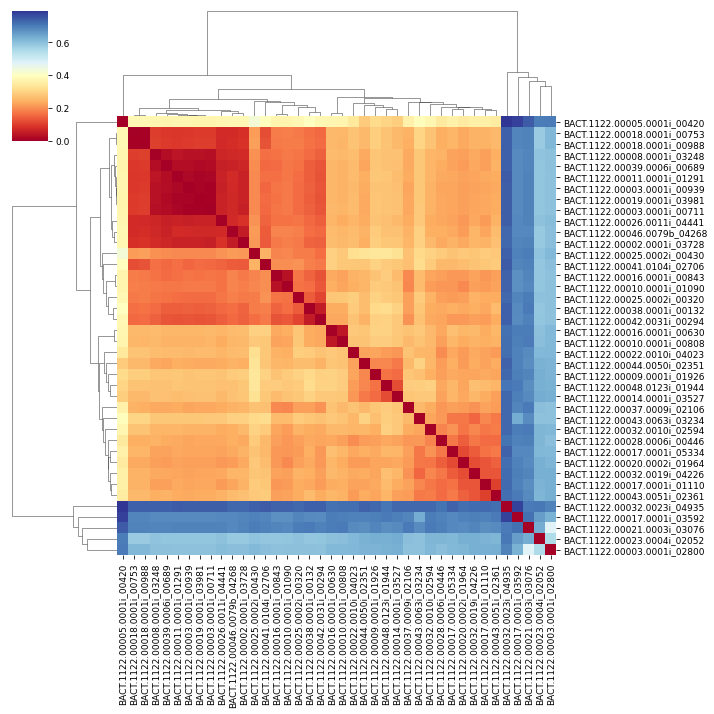

In [68]:
plt.figure(figsize=(25,22))
plt.rcParams.update({'font.size': 9})
sns.clustermap(data, cmap='RdYlBu');

In [93]:
data = data.rename(columns=copy_dict)
data = data.rename(index=copy_dict)

/home/nastya/miniconda3/envs/r4_env/lib/python3.9/site-packages/seaborn/matrix.py:624: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


<Figure size 1800x1584 with 0 Axes>

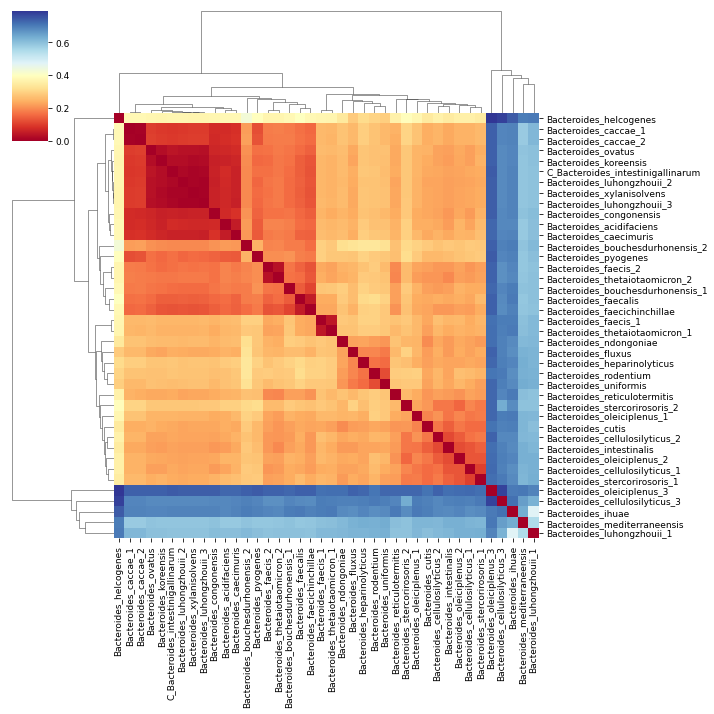

In [94]:
plt.figure(figsize=(25,22))
plt.rcParams.update({'font.size': 9})
sns.clustermap(data, cmap='RdYlBu');

# Remove 6 most distant sequences

In [76]:
aln = AlignIO.read(open('/home/nastya/Bacteroides_uniformis_annotations/CD-HIT/filtered_similar.clustal'), 'clustal')
print(aln)

Alignment with 34 rows and 268 columns
MNEKQTDTLLNVPEIVKRAKIALNLKRDSELASYLGVARTTLSN...--- BACT.1122.00016.0001i_00630
MNEKQADTLLNVPEIVKRAKIALNLKRDSELASYLGVARATLSN...--- BACT.1122.00010.0001i_00808
-----MDTCLNVGEIVKRAKIVLSFKRDSELAEFLGISRATLSN...--- BACT.1122.00037.0009i_02106
-----MDTILDVPGIIKRAKQVLKLKKDSELADYMGVSRATVTN...--- BACT.1122.00041.0104i_02706
-----MDTNLDVPGIIKRAKQALNLKRDSELAEFLGVSRATVTN...--- BACT.1122.00018.0001i_00753
-----MDTNLDVPGIIKRAKQALNLKRDSELAEFLGVSRATVTN...--- BACT.1122.00018.0001i_00988
-----MDTNLDVTGIIKRAKQVLGLKRDSELAEYLGVSRATVTN...--- BACT.1122.00046.0079b_04268
-----MDTNLDVLGIIKRAKQALDLKKDSELAGYLGVSRATVTN...--- BACT.1122.00002.0001i_03728
-----MDTFLDVTGIVKRAKQALNFKNDSELAEYLGVSRGTVSN...--- BACT.1122.00026.0011i_04441
-----MDTFLDVTGIVKRAKQVLNFKNDSELAEYLGVSRATVSN...--- BACT.1122.00008.0001i_03248
-----MDTFLDVTGIVKRAKQVLNFKNDSELAEYLGVSRATVSN...--- BACT.1122.00039.0006i_00689
-----MDTFLDVTGIVKRAKQALNFKNDSELAEYLGVSRATVSN...--- BACT.1122.00011.0001i_01291
-----MDTFLDVT

In [77]:
calculator = DistanceCalculator('identity')
dm = calculator.get_distance(aln)
print(dm)

BACT.1122.00016.0001i_00630	0
BACT.1122.00010.0001i_00808	0.04477611940298509	0
BACT.1122.00037.0009i_02106	0.3097014925373134	0.29104477611940294	0
BACT.1122.00041.0104i_02706	0.33582089552238803	0.3171641791044776	0.3022388059701493	0
BACT.1122.00018.0001i_00753	0.29104477611940294	0.2873134328358209	0.2798507462686567	0.13805970149253732	0
BACT.1122.00018.0001i_00988	0.29104477611940294	0.28358208955223885	0.27611940298507465	0.14179104477611937	0.003731343283582045	0
BACT.1122.00046.0079b_04268	0.2947761194029851	0.2873134328358209	0.2798507462686567	0.15671641791044777	0.08208955223880599	0.08582089552238803	0
BACT.1122.00002.0001i_03728	0.29850746268656714	0.29104477611940294	0.28358208955223885	0.15298507462686572	0.08955223880597019	0.09328358208955223	0.05597014925373134	0
BACT.1122.00026.0011i_04441	0.28358208955223885	0.2723880597014925	0.2723880597014925	0.16791044776119401	0.08208955223880599	0.07835820895522383	0.07835820895522383	0.09328358208955223	0
BACT.1122.00008.000

In [78]:
np.save('/home/nastya/Documents/distance_matrix_2.npy', dm)

In [79]:
dm1 = np.load(file='/home/nastya/Documents/distance_matrix_2.npy', allow_pickle=True)
dm_1 = pd.DataFrame(np.triu(dm1))
dm_2 = pd.DataFrame(np.tril(dm1))
dm_1[dm_1 == 0] = dm_2[dm_2 != 0]
dm_all = dm_1.fillna(0)

In [80]:
data = pd.DataFrame(dm_all.values, columns = dm.names, index = dm.names)
data

,BACT.1122.00016.0001i_00630,BACT.1122.00010.0001i_00808,BACT.1122.00037.0009i_02106,BACT.1122.00041.0104i_02706,BACT.1122.00018.0001i_00753,BACT.1122.00018.0001i_00988,BACT.1122.00046.0079b_04268,BACT.1122.00002.0001i_03728,BACT.1122.00026.0011i_04441,BACT.1122.00008.0001i_03248,...,BACT.1122.00014.0001i_03527,BACT.1122.00022.0010i_04023,BACT.1122.00032.0010i_02594,BACT.1122.00028.0006i_00446,BACT.1122.00017.0001i_01110,BACT.1122.00043.0051i_02361,BACT.1122.00017.0001i_05334,BACT.1122.00020.0002i_01964,BACT.1122.00032.0019i_04226,BACT.1122.00043.0063i_03234
BACT.1122.00016.0001i_00630,0.000000,0.044776,0.309701,0.335821,0.291045,0.291045,0.294776,0.298507,0.283582,0.294776,...,0.320896,0.320896,0.291045,0.264925,0.272388,0.287313,0.302239,0.287313,0.291045,0.320896
BACT.1122.00010.0001i_00808,0.044776,0.000000,0.291045,0.317164,0.287313,0.283582,0.287313,0.291045,0.272388,0.291045,...,0.317164,0.309701,0.291045,0.253731,0.276119,0.279851,0.287313,0.272388,0.279851,0.309701
BACT.1122.00037.0009i_02106,0.309701,0.291045,0.000000,0.302239,0.279851,0.276119,0.279851,0.283582,0.272388,0.268657,...,0.313433,0.309701,0.272388,0.238806,0.257463,0.250000,0.253731,0.246269,0.235075,0.291045
BACT.1122.00041.0104i_02706,0.335821,0.317164,0.302239,0.000000,0.138060,0.141791,0.156716,0.152985,0.167910,0.186567,...,0.317164,0.317164,0.324627,0.291045,0.317164,0.324627,0.291045,0.298507,0.309701,0.358209
BACT.1122.00018.0001i_00753,0.291045,0.287313,0.279851,0.138060,0.000000,0.003731,0.082090,0.089552,0.082090,0.111940,...,0.291045,0.309701,0.309701,0.276119,0.279851,0.291045,0.283582,0.268657,0.279851,0.343284
BACT.1122.00018.0001i_00988,0.291045,0.283582,0.276119,0.141791,0.003731,0.000000,0.085821,0.093284,0.078358,0.115672,...,0.291045,0.309701,0.309701,0.276119,0.279851,0.291045,0.283582,0.268657,0.279851,0.343284
BACT.1122.00046.0079b_04268,0.294776,0.287313,0.279851,0.156716,0.082090,0.085821,0.000000,0.055970,0.078358,0.074627,...,0.305970,0.294776,0.276119,0.276119,0.261194,0.294776,0.268657,0.250000,0.283582,0.335821
BACT.1122.00002.0001i_03728,0.298507,0.291045,0.283582,0.152985,0.089552,0.093284,0.055970,0.000000,0.093284,0.082090,...,0.313433,0.298507,0.291045,0.268657,0.279851,0.302239,0.279851,0.268657,0.283582,0.335821
BACT.1122.00026.0011i_04441,0.283582,0.272388,0.272388,0.167910,0.082090,0.078358,0.078358,0.093284,0.000000,0.070896,...,0.291045,0.283582,0.272388,0.264925,0.246269,0.279851,0.257463,0.242537,0.264925,0.320896
BACT.1122.00008.0001i_03248,0.294776,0.291045,0.268657,0.186567,0.111940,0.115672,0.074627,0.082090,0.070896,0.000000,...,0.305970,0.298507,0.283582,0.279851,0.253731,0.276119,0.257463,0.253731,0.268657,0.317164


/home/nastya/miniconda3/envs/r4_env/lib/python3.9/site-packages/seaborn/matrix.py:624: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


<Figure size 1800x1584 with 0 Axes>

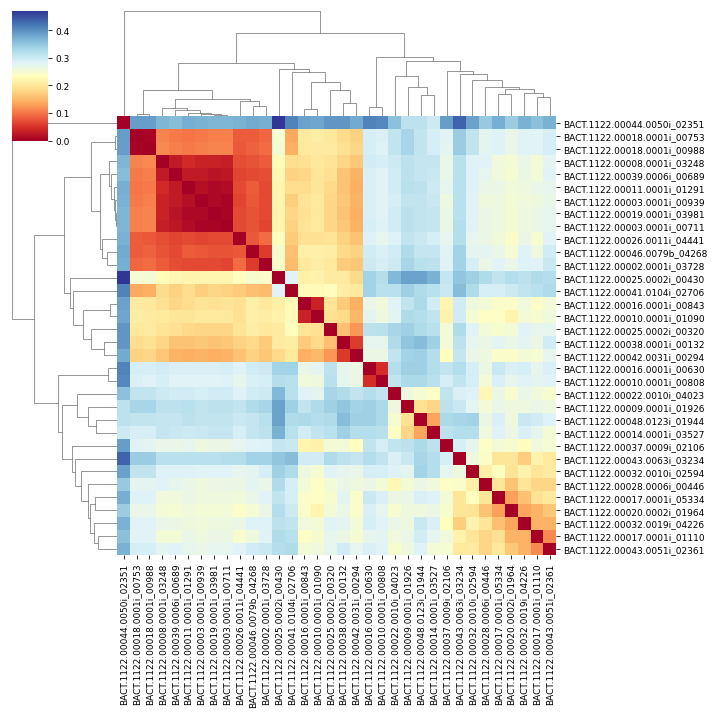

In [81]:
plt.figure(figsize=(25,22))
plt.rcParams.update({'font.size': 9})
sns.clustermap(data, cmap='RdYlBu');

In [32]:
copy_dict = {'BACT.1122.00046.0079b_04268': 'Bacteroides_acidifaciens',
  'BACT.1122.00025.0002i_00320': 'Bacteroides_bouchesdurhonensis_1',
 'BACT.1122.00025.0002i_00430': 'Bacteroides_bouchesdurhonensis_2',
 'BACT.1122.00018.0001i_00753': 'Bacteroides_caccae_1',
 'BACT.1122.00018.0001i_00988': 'Bacteroides_caccae_2',
 'BACT.1122.00002.0001i_03728': 'Bacteroides_caecimuris',
 'BACT.1122.00017.0001i_01110': 'Bacteroides_cellulosilyticus_1',
 'BACT.1122.00017.0001i_05334': 'Bacteroides_cellulosilyticus_2',
 'BACT.1122.00017.0001i_03592': 'Bacteroides_cellulosilyticus_3',
 'BACT.1122.00026.0011i_04441': 'Bacteroides_congonensis',
 'BACT.1122.00028.0006i_00446': 'Bacteroides_cutis',
 'BACT.1122.00038.0001i_00132': 'Bacteroides_faecalis',
 'BACT.1122.00042.0031i_00294': 'Bacteroides_faecichinchillae',
 'BACT.1122.00016.0001i_00630': 'Bacteroides_faecis_1',
 'BACT.1122.00016.0001i_00843': 'Bacteroides_faecis_2',
 'BACT.1122.00044.0050i_02351': 'Bacteroides_fluxus',
 'BACT.1122.00005.0001i_00420': 'Bacteroides_helcogenes',
 'BACT.1122.00009.0001i_01926': 'Bacteroides_heparinolyticus',
 'BACT.1122.00021.0003i_03076': 'Bacteroides_ihuae',
 'BACT.1122.00020.0002i_01964': 'Bacteroides_intestinalis',
 'BACT.1122.00039.0006i_00689': 'Bacteroides_koreensis',
 'BACT.1122.00003.0001i_02800': 'Bacteroides_luhongzhouii_1',
 'BACT.1122.00003.0001i_00939': 'Bacteroides_luhongzhouii_2',
 'BACT.1122.00003.0001i_00711': 'Bacteroides_luhongzhouii_3',
 'BACT.1122.00023.0004i_02052': 'Bacteroides_mediterraneensis',
 'BACT.1122.00022.0010i_04023': 'Bacteroides_ndongoniae',
 'BACT.1122.00032.0010i_02594': 'Bacteroides_oleiciplenus_1',
 'BACT.1122.00032.0019i_04226': 'Bacteroides_oleiciplenus_2',
 'BACT.1122.00032.0023i_04935': 'Bacteroides_oleiciplenus_3',
 'BACT.1122.00008.0001i_03248': 'Bacteroides_ovatus',
 'BACT.1122.00041.0104i_02706': 'Bacteroides_pyogenes',
 'BACT.1122.00048.0123i_01944': 'Bacteroides_rodentium',
 'BACT.1122.00043.0051i_02361': 'Bacteroides_stercorirosoris_1',
 'BACT.1122.00043.0063i_03234': 'Bacteroides_stercorirosoris_2',
 'BACT.1122.00010.0001i_00808': 'Bacteroides_thetaiotaomicron_1',
 'BACT.1122.00010.0001i_01090': 'Bacteroides_thetaiotaomicron_2',
 'BACT.1122.00014.0001i_03527': 'Bacteroides_uniformis',
 'BACT.1122.00019.0001i_03981': 'Bacteroides_xylanisolvens',
 'BACT.1122.00011.0001i_01291': 'C_Bacteroides_intestinigallinarum',
 'BACT.1122.00037.0009i_02106': 'Bacteroides_reticulotermitis'}

In [84]:
data = data.rename(columns=copy_dict)
data

,Bacteroides_faecis_1,Bacteroides_thetaiotaomicron_1,Bacteroides_reticulotermitis,Bacteroides_pyogenes,Bacteroides_caccae_1,Bacteroides_caccae_2,Bacteroides_acidifaciens,Bacteroides_caecimuris,Bacteroides_congonensis,Bacteroides_ovatus,...,Bacteroides_uniformis,Bacteroides_ndongoniae,Bacteroides_oleiciplenus_1,Bacteroides_cutis,Bacteroides_cellulosilyticus_1,Bacteroides_stercorirosoris_1,Bacteroides_cellulosilyticus_2,Bacteroides_intestinalis,Bacteroides_oleiciplenus_2,Bacteroides_stercorirosoris_2
BACT.1122.00016.0001i_00630,0.000000,0.044776,0.309701,0.335821,0.291045,0.291045,0.294776,0.298507,0.283582,0.294776,...,0.320896,0.320896,0.291045,0.264925,0.272388,0.287313,0.302239,0.287313,0.291045,0.320896
BACT.1122.00010.0001i_00808,0.044776,0.000000,0.291045,0.317164,0.287313,0.283582,0.287313,0.291045,0.272388,0.291045,...,0.317164,0.309701,0.291045,0.253731,0.276119,0.279851,0.287313,0.272388,0.279851,0.309701
BACT.1122.00037.0009i_02106,0.309701,0.291045,0.000000,0.302239,0.279851,0.276119,0.279851,0.283582,0.272388,0.268657,...,0.313433,0.309701,0.272388,0.238806,0.257463,0.250000,0.253731,0.246269,0.235075,0.291045
BACT.1122.00041.0104i_02706,0.335821,0.317164,0.302239,0.000000,0.138060,0.141791,0.156716,0.152985,0.167910,0.186567,...,0.317164,0.317164,0.324627,0.291045,0.317164,0.324627,0.291045,0.298507,0.309701,0.358209
BACT.1122.00018.0001i_00753,0.291045,0.287313,0.279851,0.138060,0.000000,0.003731,0.082090,0.089552,0.082090,0.111940,...,0.291045,0.309701,0.309701,0.276119,0.279851,0.291045,0.283582,0.268657,0.279851,0.343284
BACT.1122.00018.0001i_00988,0.291045,0.283582,0.276119,0.141791,0.003731,0.000000,0.085821,0.093284,0.078358,0.115672,...,0.291045,0.309701,0.309701,0.276119,0.279851,0.291045,0.283582,0.268657,0.279851,0.343284
BACT.1122.00046.0079b_04268,0.294776,0.287313,0.279851,0.156716,0.082090,0.085821,0.000000,0.055970,0.078358,0.074627,...,0.305970,0.294776,0.276119,0.276119,0.261194,0.294776,0.268657,0.250000,0.283582,0.335821
BACT.1122.00002.0001i_03728,0.298507,0.291045,0.283582,0.152985,0.089552,0.093284,0.055970,0.000000,0.093284,0.082090,...,0.313433,0.298507,0.291045,0.268657,0.279851,0.302239,0.279851,0.268657,0.283582,0.335821
BACT.1122.00026.0011i_04441,0.283582,0.272388,0.272388,0.167910,0.082090,0.078358,0.078358,0.093284,0.000000,0.070896,...,0.291045,0.283582,0.272388,0.264925,0.246269,0.279851,0.257463,0.242537,0.264925,0.320896
BACT.1122.00008.0001i_03248,0.294776,0.291045,0.268657,0.186567,0.111940,0.115672,0.074627,0.082090,0.070896,0.000000,...,0.305970,0.298507,0.283582,0.279851,0.253731,0.276119,0.257463,0.253731,0.268657,0.317164


In [85]:
data = data.rename(index=copy_dict)
data

,Bacteroides_faecis_1,Bacteroides_thetaiotaomicron_1,Bacteroides_reticulotermitis,Bacteroides_pyogenes,Bacteroides_caccae_1,Bacteroides_caccae_2,Bacteroides_acidifaciens,Bacteroides_caecimuris,Bacteroides_congonensis,Bacteroides_ovatus,...,Bacteroides_uniformis,Bacteroides_ndongoniae,Bacteroides_oleiciplenus_1,Bacteroides_cutis,Bacteroides_cellulosilyticus_1,Bacteroides_stercorirosoris_1,Bacteroides_cellulosilyticus_2,Bacteroides_intestinalis,Bacteroides_oleiciplenus_2,Bacteroides_stercorirosoris_2
Bacteroides_faecis_1,0.000000,0.044776,0.309701,0.335821,0.291045,0.291045,0.294776,0.298507,0.283582,0.294776,...,0.320896,0.320896,0.291045,0.264925,0.272388,0.287313,0.302239,0.287313,0.291045,0.320896
Bacteroides_thetaiotaomicron_1,0.044776,0.000000,0.291045,0.317164,0.287313,0.283582,0.287313,0.291045,0.272388,0.291045,...,0.317164,0.309701,0.291045,0.253731,0.276119,0.279851,0.287313,0.272388,0.279851,0.309701
Bacteroides_reticulotermitis,0.309701,0.291045,0.000000,0.302239,0.279851,0.276119,0.279851,0.283582,0.272388,0.268657,...,0.313433,0.309701,0.272388,0.238806,0.257463,0.250000,0.253731,0.246269,0.235075,0.291045
Bacteroides_pyogenes,0.335821,0.317164,0.302239,0.000000,0.138060,0.141791,0.156716,0.152985,0.167910,0.186567,...,0.317164,0.317164,0.324627,0.291045,0.317164,0.324627,0.291045,0.298507,0.309701,0.358209
Bacteroides_caccae_1,0.291045,0.287313,0.279851,0.138060,0.000000,0.003731,0.082090,0.089552,0.082090,0.111940,...,0.291045,0.309701,0.309701,0.276119,0.279851,0.291045,0.283582,0.268657,0.279851,0.343284
Bacteroides_caccae_2,0.291045,0.283582,0.276119,0.141791,0.003731,0.000000,0.085821,0.093284,0.078358,0.115672,...,0.291045,0.309701,0.309701,0.276119,0.279851,0.291045,0.283582,0.268657,0.279851,0.343284
Bacteroides_acidifaciens,0.294776,0.287313,0.279851,0.156716,0.082090,0.085821,0.000000,0.055970,0.078358,0.074627,...,0.305970,0.294776,0.276119,0.276119,0.261194,0.294776,0.268657,0.250000,0.283582,0.335821
Bacteroides_caecimuris,0.298507,0.291045,0.283582,0.152985,0.089552,0.093284,0.055970,0.000000,0.093284,0.082090,...,0.313433,0.298507,0.291045,0.268657,0.279851,0.302239,0.279851,0.268657,0.283582,0.335821
Bacteroides_congonensis,0.283582,0.272388,0.272388,0.167910,0.082090,0.078358,0.078358,0.093284,0.000000,0.070896,...,0.291045,0.283582,0.272388,0.264925,0.246269,0.279851,0.257463,0.242537,0.264925,0.320896
Bacteroides_ovatus,0.294776,0.291045,0.268657,0.186567,0.111940,0.115672,0.074627,0.082090,0.070896,0.000000,...,0.305970,0.298507,0.283582,0.279851,0.253731,0.276119,0.257463,0.253731,0.268657,0.317164


/home/nastya/miniconda3/envs/r4_env/lib/python3.9/site-packages/seaborn/matrix.py:624: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


<Figure size 1800x1584 with 0 Axes>

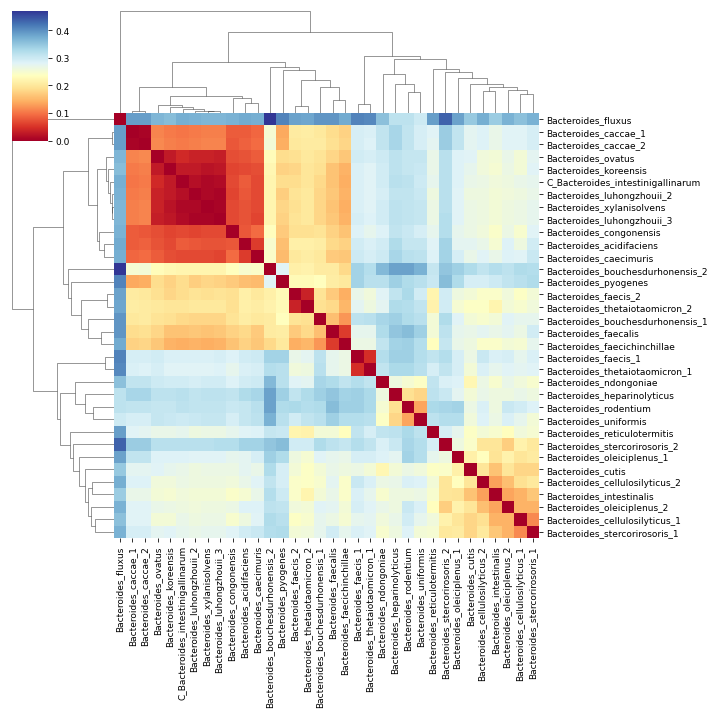

In [86]:
plt.figure(figsize=(25,22))
plt.rcParams.update({'font.size': 9})
sns.clustermap(data, cmap='RdYlBu');

# CD-HIT clustering

In [20]:
from Bio import SeqIO

coun = 0
id_dict = {}
for record in SeqIO.parse('/home/nastya/Bacteroides_uniformis_annotations/CD-HIT/lexA_bacteroides_filtered.fa', "fasta"):
    coun +=1
    with open('/home/nastya/Bacteroides_uniformis_annotations/CD-HIT/lexA_changed_names.fa', 'a') as out:
        out.write(f'>BACT_{coun}\n{record.seq}\n')
        id_dict.update({f'BACT_{coun}':record.id})

In [21]:
id_dict

{'BACT_1': 'BACT.1122.00046.0079b_04268',
 'BACT_2': 'BACT.1122.00025.0002i_00320',
 'BACT_3': 'BACT.1122.00025.0002i_00430',
 'BACT_4': 'BACT.1122.00018.0001i_00753',
 'BACT_5': 'BACT.1122.00018.0001i_00988',
 'BACT_6': 'BACT.1122.00002.0001i_03728',
 'BACT_7': 'BACT.1122.00017.0001i_01110',
 'BACT_8': 'BACT.1122.00017.0001i_03592',
 'BACT_9': 'BACT.1122.00017.0001i_05334',
 'BACT_10': 'BACT.1122.00026.0011i_04441',
 'BACT_11': 'BACT.1122.00028.0006i_00446',
 'BACT_12': 'BACT.1122.00038.0001i_00132',
 'BACT_13': 'BACT.1122.00042.0031i_00294',
 'BACT_14': 'BACT.1122.00016.0001i_00630',
 'BACT_15': 'BACT.1122.00016.0001i_00843',
 'BACT_16': 'BACT.1122.00044.0050i_02351',
 'BACT_17': 'BACT.1122.00005.0001i_00420',
 'BACT_18': 'BACT.1122.00009.0001i_01926',
 'BACT_19': 'BACT.1122.00021.0003i_03076',
 'BACT_20': 'BACT.1122.00020.0002i_01964',
 'BACT_21': 'BACT.1122.00039.0006i_00689',
 'BACT_22': 'BACT.1122.00003.0001i_00711',
 'BACT_23': 'BACT.1122.00003.0001i_00939',
 'BACT_24': 'BACT.11

In [28]:
order_list = ['BACT_29',
'BACT_17',
'BACT_14',
'BACT_36',
'BACT_18',
'BACT_33',
'BACT_38',
'BACT_7',
'BACT_11',
'BACT_20',
'BACT_28',
'BACT_34',
'BACT_35',
'BACT_16',
'BACT_26',
'BACT_27',
'BACT_9',
'BACT_1',
'BACT_4',
'BACT_5',
'BACT_6',
'BACT_10',
'BACT_13',
'BACT_21',
'BACT_22',
'BACT_23',
'BACT_30',
'BACT_31',
'BACT_39',
'BACT_40',
'BACT_2',
'BACT_12',
'BACT_3',
'BACT_15',
'BACT_37',
'BACT_32',            
'BACT_19',
'BACT_24',
'BACT_25',
'BACT_8']

In [29]:
ord_l = [id_dict[i] for i in order_list]
ord_l

['BACT.1122.00032.0023i_04935',
 'BACT.1122.00005.0001i_00420',
 'BACT.1122.00016.0001i_00630',
 'BACT.1122.00010.0001i_00808',
 'BACT.1122.00009.0001i_01926',
 'BACT.1122.00048.0123i_01944',
 'BACT.1122.00014.0001i_03527',
 'BACT.1122.00017.0001i_01110',
 'BACT.1122.00028.0006i_00446',
 'BACT.1122.00020.0002i_01964',
 'BACT.1122.00032.0019i_04226',
 'BACT.1122.00043.0051i_02361',
 'BACT.1122.00043.0063i_03234',
 'BACT.1122.00044.0050i_02351',
 'BACT.1122.00022.0010i_04023',
 'BACT.1122.00032.0010i_02594',
 'BACT.1122.00017.0001i_05334',
 'BACT.1122.00046.0079b_04268',
 'BACT.1122.00018.0001i_00753',
 'BACT.1122.00018.0001i_00988',
 'BACT.1122.00002.0001i_03728',
 'BACT.1122.00026.0011i_04441',
 'BACT.1122.00042.0031i_00294',
 'BACT.1122.00039.0006i_00689',
 'BACT.1122.00003.0001i_00711',
 'BACT.1122.00003.0001i_00939',
 'BACT.1122.00008.0001i_03248',
 'BACT.1122.00041.0104i_02706',
 'BACT.1122.00019.0001i_03981',
 'BACT.1122.00011.0001i_01291',
 'BACT.1122.00025.0002i_00320',
 'BACT.1

In [33]:
new_data = data.loc[ord_l, ord_l]

In [37]:
new_data = new_data.rename(columns=copy_dict)
new_data = new_data.rename(index=copy_dict)

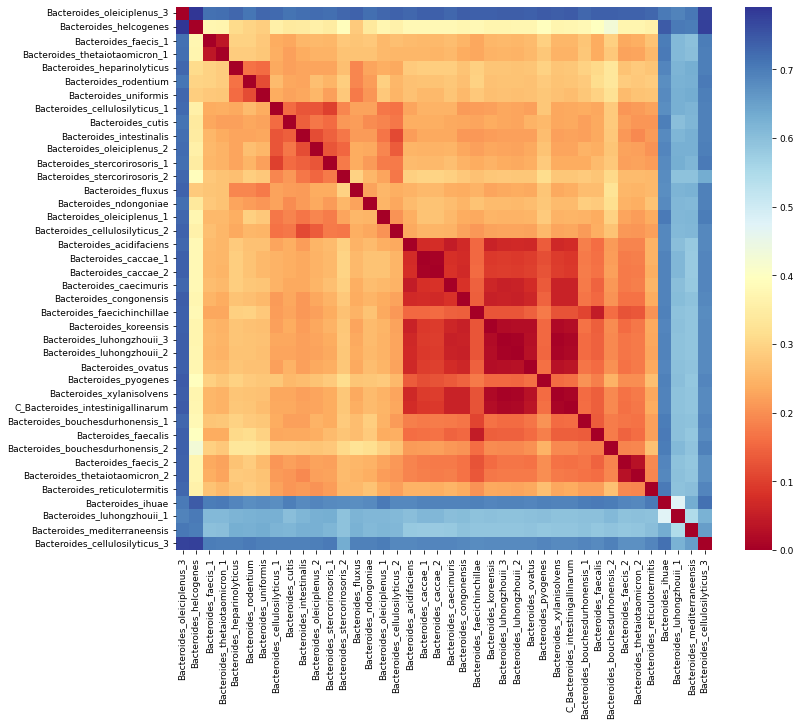

In [40]:
plt.figure(figsize=(12,10))
plt.rcParams.update({'font.size': 9})
sns.heatmap(new_data, cmap='RdYlBu');